# Práctica Profesionalizante 3
# IEFI

Dado el dataset X.npy, y.npy donde y es bivariada:  

- Cárguelos como arrays de numpy con los nombres X e y respectivamente.

In [1]:
import pandas as pd 
import numpy as np 
import sklearn 

In [2]:
X = np.load('data/X.npy', allow_pickle=True)
y = np.load('data/y.npy', allow_pickle=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
scaler.fit(X)
X = scaler.transform(X)

In [4]:
X = pd.DataFrame(X)

In [5]:
for i in range(X.shape[1]):
    X.rename(columns={i:('x'+str(i+1))}, inplace=True)

In [6]:
X.shape

(1000, 20)

In [7]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.097990,0.340667,-0.242157,0.134337,-0.271241,0.130791,0.111032,-0.174739,-0.255644,0.134337,0.169878,0.460179,-0.321191,-0.010534,-0.120602,-0.164123,0.409250,-0.183973,0.085108,0.085108
1,0.737100,-0.220382,0.401955,-0.711231,0.572058,0.196666,0.452551,0.217239,0.673526,-0.711231,-0.403847,0.054373,-0.301104,-0.160751,0.014660,-0.024911,0.169984,-0.220774,-0.336932,-0.336932
2,-0.121484,-0.175109,0.271544,0.316087,-0.259378,-0.006024,-0.106266,0.425087,-0.002332,0.316087,-0.427018,-0.028487,-0.004035,0.299433,0.287323,-0.334432,0.050210,-0.242072,-0.098560,-0.098560
3,0.655278,-0.122830,-0.012052,-0.279743,0.818249,0.137160,0.107157,-0.020696,0.523424,-0.279743,0.136629,-0.255718,-0.329038,-0.285599,0.430301,0.067259,0.264324,0.075779,-0.776885,-0.776885
4,0.269292,0.182895,-0.126721,0.106437,-0.342351,-0.096885,0.213502,-0.115173,0.130651,0.106437,-0.086828,-0.543681,0.283055,0.270080,0.266788,-0.386429,0.203762,-0.323645,-0.164142,-0.164142


In [8]:
y = pd.DataFrame(y)
y.rename(columns={0:'y'}, inplace=True)

In [9]:
y.shape

(1000, 1)

In [10]:
y.head()

,y
0,0
1,1
2,1
3,0
4,1


## Determine cuántas features y cuantas observaciones tiene el dataset.

In [11]:
observaciones = X.shape[0]
observaciones

1000

In [12]:
features = X.shape[1]
features

20

In [13]:
observaciones_y = y.shape[0]
observaciones_y

1000

A los fines de comprendernos, diremos que los nombres de las features son $ x_1, x_2 ...$

## Genere Train y Test 

en una proporción 80/20 (random_state=123),
- Llámelos X_train e y_train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123, stratify = y)

In [15]:
X_train.shape

(800, 20)

In [16]:
y_train.shape

(800, 1)

Ud está interesado en **interpretar** el modelo, para lo cual decide utilizar un modelo de **Regresión Logística** porque es fácilmente interpretable.  



## Crear un modelo de Regresión Logística: 

    - sin regularización (penalty=none)  
    - con random_state=123
    - dejar el resto de los parámetros con sus valores por defecto
    - llámelo LR


- Entrene el modelo en Train 
- Evalúelo en el Test con Accuracy.
- Muestre el valor de Accuracy obtenido

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty = 'none', fit_intercept = True, random_state = 123).fit(X_train, y_train)

C:\Users\luisg\anaconda3\envs\Redes_Neuronales\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pronostico

In [18]:
LR.predict_proba(X_test)[:5]

array([[0.96955499, 0.03044501],
       [0.37290666, 0.62709334],
       [0.08136998, 0.91863002],
       [0.95430268, 0.04569732],
       [0.95899948, 0.04100052]])

Métrica de evaluacion : 'accuracy'

In [19]:
LR.score(X_test, y_test)

0.8

Asumamos que la accuracy obtenida es razonable ( debería dar un valor superior al 80%, sino revise).

## Genere el "modelo para producción" - llámelo LRp

In [20]:
LRp = LogisticRegression().fit(X, y)
LRp.predict

C:\Users\luisg\anaconda3\envs\Redes_Neuronales\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<bound method LinearClassifierMixin.predict of LogisticRegression()>

Del teorico sabemos que en el caso de Regresión Logística la función con la que aproximamos es:  

$$ y \approx h(x) = \frac {1}{1+e^-(w_0+w_1 x_1 +...+ w_n x_n)}$$  

Estamos interesados en conocer el valor de todos los parámetros $w_i$ que obtuvo nuestro modelo después de ser entrenado.  


## Obtener $w_0$  

In [21]:
w0 =  LRp.intercept_
for i in w0:
    print('w0 =',i)

w0 = -0.25792678833856764


## Obtenga el resto de los parámetros $w_1,w_2 ...,w_n$  

quizá tenga que investigar un poco cómo obtenerlos, ya que es un poco confusa la documentación oficial ... pero lo vimos en materias anteriores ... si mi memoria no me falla cuando estudiamos Regresión Lineal ...

Muestre los valores obtenidos:

In [22]:
w = pd.DataFrame(LRp.coef_)
for i in range(w.shape[1]):
    w.rename(columns={i:('w'+str(i+1))}, inplace=True)
w

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20
0,0.998069,-2.809589,0.822913,-0.069418,-1.779331,-0.356276,1.721779,1.607665,1.310803,-0.069418,0.036419,0.580331,0.078954,2.80712,-1.428765,-1.57178,-0.986822,0.042736,-0.44331,-0.44331


Debería tener tantos elementos como features, verifique por las dudas.

## Otenga el valor de $w_1$ 

llámelo w1 y muéstrelo

In [23]:
w['w1']

0    0.998069
Name: w1, dtype: float64

Supongamos que el problema trataba sobre la capacidad de muchos medicamentos de inactivar un virus.   

- Cada observación corresponde a un medicamento distinto.  
- Cada feature es la cantidad de determinadas sustancias que formaban parte de cada medicamento,  
- la variable y, el target, indica si el medicamento efectivamente inactiva al virus (y=1) o no (y=0).  

## Muestre los pronósticos que entrega su modelo de producción para los 4 primeros medicamentos del DataSet orginal (X)

In [24]:
X.sort_index().iloc[0:4] 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.097990,0.340667,-0.242157,0.134337,-0.271241,0.130791,0.111032,-0.174739,-0.255644,0.134337,0.169878,0.460179,-0.321191,-0.010534,-0.120602,-0.164123,0.409250,-0.183973,0.085108,0.085108
1,0.737100,-0.220382,0.401955,-0.711231,0.572058,0.196666,0.452551,0.217239,0.673526,-0.711231,-0.403847,0.054373,-0.301104,-0.160751,0.014660,-0.024911,0.169984,-0.220774,-0.336932,-0.336932
2,-0.121484,-0.175109,0.271544,0.316087,-0.259378,-0.006024,-0.106266,0.425087,-0.002332,0.316087,-0.427018,-0.028487,-0.004035,0.299433,0.287323,-0.334432,0.050210,-0.242072,-0.098560,-0.098560
3,0.655278,-0.122830,-0.012052,-0.279743,0.818249,0.137160,0.107157,-0.020696,0.523424,-0.279743,0.136629,-0.255718,-0.329038,-0.285599,0.430301,0.067259,0.264324,0.075779,-0.776885,-0.776885


In [25]:
LRp.predict(X.sort_index().iloc[0:4])

array([0, 1, 1, 0])

## Muestre las probabilidades que entrega su modelo de producción para los mismos 4 medicamentos

Observe que para cada observación (medicamento) sklearn le devuelve dos probabilidades, la primera es la probabilidad de que y=0, la segunda es la probabilidad de que sea 1 (los  pone en ese orden porque ordena las etiquetas de y de menor a mayor). 

In [26]:
LRp.predict_proba(X.sort_index().iloc[0:4])

array([[0.76180334, 0.23819666],
       [0.10608317, 0.89391683],
       [0.09937434, 0.90062566],
       [0.76093166, 0.23906834]])

## Muestre la probabilidad  de que el primer medicamento tenga un y=1, llámelo p_1

In [27]:
p_1 = LRp.predict_proba(X.sort_index().iloc[0:1])
p_1[:,1]

array([0.23819666])

## Calcule el odd de que el primer medicamento tenga un y=1, llámelo odd_1  

- Recuerde que tenemos una fórmula sencilla para calcular el odd conociendo la probabilidad ...

In [28]:
p_1 = pd.DataFrame(p_1)
odd_1 = p_1[1]/(1-p_1[1])
odd_1

0    0.312675
Name: 1, dtype: float64

## Analice:  
Supongamos que nuestro laboratorio es dueño del primer medicamento del dataset, lamentablemente no inactiva a al virus, pero  tiene el plan de aumentar en 1 unidad la cantidad de la sustancia $x_1$ para ver qué pasaría:  

### Esto debería aumentar o disminuir el odd_1 y por ende la probabilidad de que el medicamento fuera efectivo contra el virus (y=1)?

**Respuesta:**  Al incrementar la variable $x_1$ (que es positiva) en una unidad, el odd se ve **multiplicado** por el número (siempre positivo) $ e^{w_i}$. Por ello, aumentando en 1 en valor de $x_1$, tambien aumentaría la probabilidad de que el medicamento fuera efectivo contra el virus. 

### Cómo podría calcular cuanto debería valer el nuevo valor de  odd_1? Calcule el nuevo odd_1, llámelo odd_1_nuevo  


In [29]:
Fila_1 = X.iloc[0:1]
Fila_1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.09799,0.340667,-0.242157,0.134337,-0.271241,0.130791,0.111032,-0.174739,-0.255644,0.134337,0.169878,0.460179,-0.321191,-0.010534,-0.120602,-0.164123,0.40925,-0.183973,0.085108,0.085108


In [30]:
w

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20
0,0.998069,-2.809589,0.822913,-0.069418,-1.779331,-0.356276,1.721779,1.607665,1.310803,-0.069418,0.036419,0.580331,0.078954,2.80712,-1.428765,-1.57178,-0.986822,0.042736,-0.44331,-0.44331


In [31]:
z = w0 + w['w1']*(Fila_1['x1']+1) + w['w2']*Fila_1['x2'] + w['w3']*Fila_1['x3'] + w['w4']*Fila_1['x4'] + w['w5']*Fila_1['x5'] + w['w6']*Fila_1['x6'] + w['w7']*Fila_1['x7'] + w['w8']*Fila_1['x8'] + w['w9']*Fila_1['x9'] + w['w10']*Fila_1['x10'] + w['w11']*Fila_1['x11'] + w['w12']*Fila_1['x12'] + w['w13']*Fila_1['x13'] + w['w14']*Fila_1['x14'] + w['w15']*Fila_1['x15'] + w['w16']*Fila_1['x16'] + w['w17']*Fila_1['x17'] + w['w18']*Fila_1['x18'] + w['w19']*Fila_1['x19'] + w['w20']*Fila_1['x20']
z

0   -0.164522
dtype: float64

In [41]:
import math
odd_1_nuevo = math.e**z
odd_1_nuevo

0    0.848299
dtype: float64

### Calcule cuál debería ser la probabilidad de que y=1 en este situación, llámela p1_nuevo.   

- Recuerde que tenemos una fórmula sencilla para calcular la probabilidad conociendo el odd...  por las dudas, era:  

$$ p= \frac{odd} {1+odd}$$

In [42]:
p_1_nuevo = odd_1_nuevo/(1 + odd_1_nuevo)
p_1_nuevo

0    0.458962
dtype: float64

### Alcanzaría para que se considere que ahora el medicamento 1 pase a ser efectivo?

**Respuesta:** Aumentando la x1 en 1 la probabilidad de que el medicamento uno se conviera en efectivo no es suficiente para ser efectivo, pero dicho valor pasa de 0.23819666 a 0.462579

## Qué podriamos aconsejar a este laboratorio que es propietario  del medicamento 1?

Respuesta:  Lo que podríamos aconsejar al laboratorio es que trabaje sobre las sustancias x12, x17 y x2 que formaban parte del medicamento ya que, siendo las de mayor valor positivo, incrementándolas se lograra incrementar la probabilidad de que el medicamento se aefectivo contra el virus y, por consecuencia, el odd ratio.

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.09799,0.340667,-0.242157,0.134337,-0.271241,0.130791,0.111032,-0.174739,-0.255644,0.134337,0.169878,0.460179,-0.321191,-0.010534,-0.120602,-0.164123,0.40925,-0.183973,0.085108,0.085108


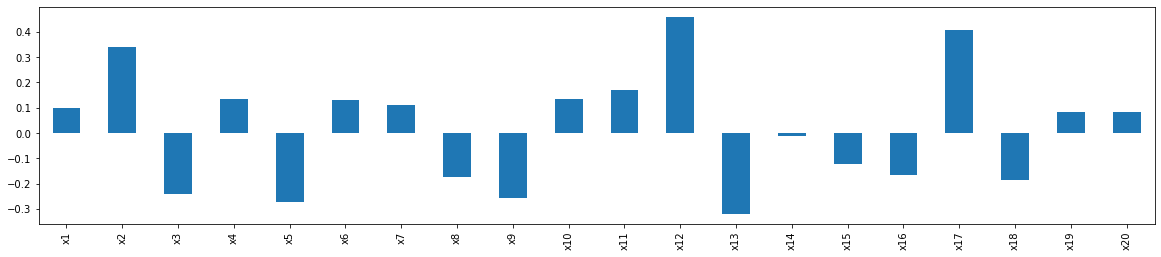

In [43]:
import matplotlib.pyplot as plt
Fila_1 = X.iloc[0:1]
Fila_1.iloc[0].plot(kind="bar",figsize=(20,4))
Fila_1

**Ahora vamos a verificar nuestros cálculos.**  

Si creamos una nueva obsrevación que sea igual en todos los valores de features a la primera de X, excepto que sumemos 1 a la cantidad de $x_1$ y luego le pedimos a nuestro modelo de producción que pronostique las probabilidades, el valor obtenido debería coincidir con el que hemos calculado (si la teoría y nuestros cálculos estaban bien!). Hagámoslo.

## Cree una nueva observación que sea igual a la del primer medicamento, excepto que la cantidad de $x_1$ esté incrementada en 1.  

Llamemos a este nuevo medicamento M1. (Puede ser más engorroso de lo que parece a primera vista ...)

In [44]:
M1 = Fila_1.replace({X.iloc[:,0].iloc[0]:X.iloc[:,0].iloc[0]+1})
M1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1.09799,0.340667,-0.242157,0.134337,-0.271241,0.130791,0.111032,-0.174739,-0.255644,0.134337,0.169878,0.460179,-0.321191,-0.010534,-0.120602,-0.164123,0.40925,-0.183973,0.085108,0.085108


## Con su modelo de producción calcule la probabilidad de que y sea 1 para M1

(Si al pronosticar le da error, lo más probable es que el formato de M1 sea el problema, compárelo con el formato de X ...sklearn es un poco estricto con los formatos de los datos de entrada ...)  

- Finalmente muestre que efectivamente la teoría era correcta. Lamentablemente habrá que cambiar más que una unidad para que el medicamento sea efectivo contra el virus!

Probabilidad

In [45]:
probabilidad_M1 = pd.DataFrame(LRp.predict_proba(M1))
probabilidad_M1[1]

0    0.458962
Name: 1, dtype: float64

Odd

In [46]:
odd_M1 = probabilidad_M1[1]/(1-probabilidad_M1[1])
odd_M1

0    0.848299
Name: 1, dtype: float64

Probabilidad calculada manualmente

In [47]:
p_1_nuevo

0    0.458962
dtype: float64

In [48]:
odd_1_nuevo

0    0.848299
dtype: float64